Importing Kaggle.josn file

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downlaoding the dataset

In [6]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.12G/2.13G [00:27<00:00, 44.0MB/s]
100% 2.13G/2.13G [00:27<00:00, 82.9MB/s]


Unzip the dataset

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip')
zip_ref.extractall('/content')
zip_ref.close()

Importing Required Libraries and performing Data Splliting

In [37]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='/content/leapgestrecog/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'08_palm_moved', '06_index', '02_l', '07_ok', '05_thumb', '01_palm', '04_fist_moved', '09_c', '03_fist', '10_down'}


Data Preprocessing

In [38]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])




print(classes)

{8: 'palm_moved', 6: 'index', 2: 'l', 7: 'ok', 5: 'thumb', 1: 'palm', 4: 'fist_moved', 9: 'c', 3: 'fist', 10: 'down'}


In [39]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))

            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))

*** 01 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 05 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 06 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 07 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 03 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 04 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 08 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 02 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 00 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
*** 09 ***
08_palm_moved
06_index
02_l
07_ok
05_thumb
01_palm
04_fist_moved
09_c
03_fist
10_down
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


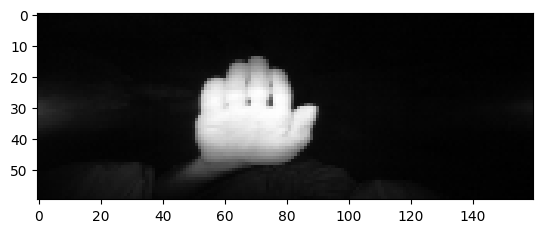

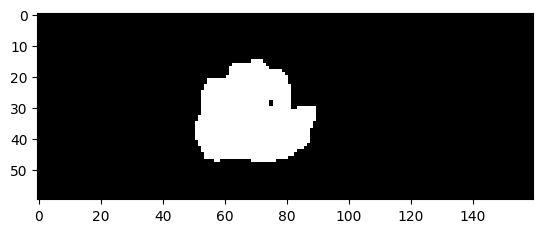

Class Label: 2


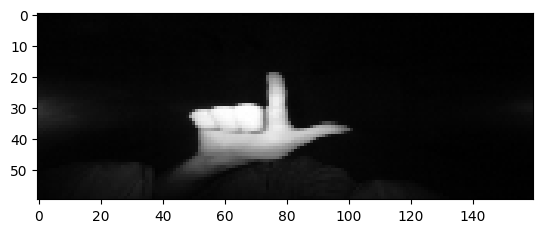

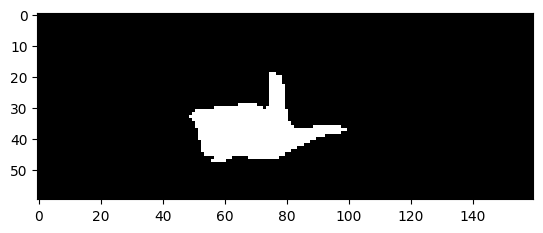

Class Label: 3


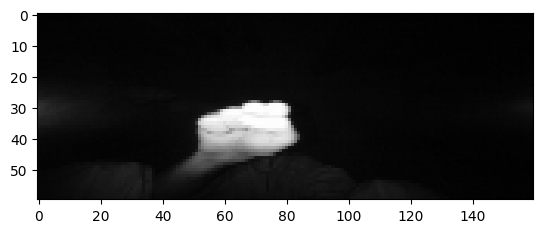

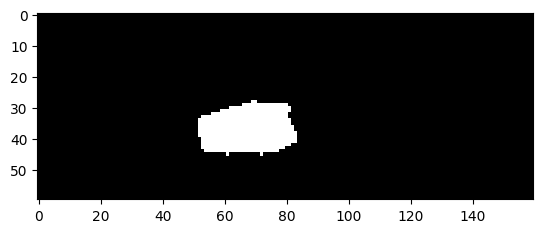

Class Label: 4


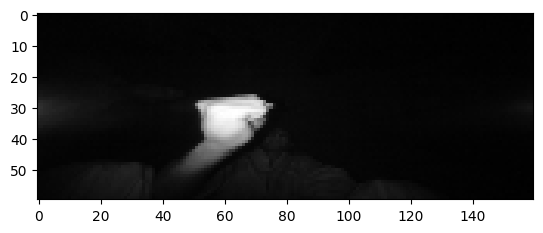

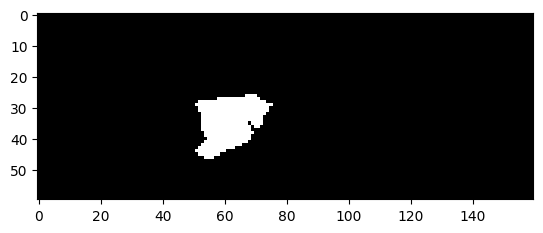

Class Label: 5


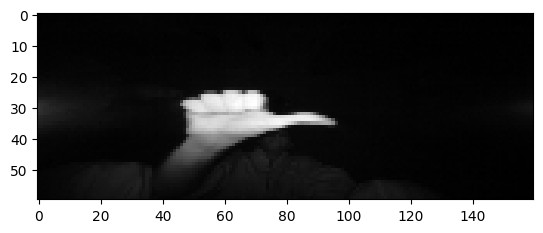

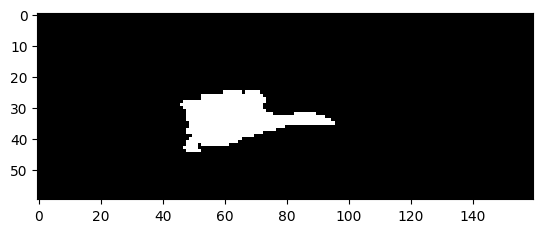

Class Label: 6


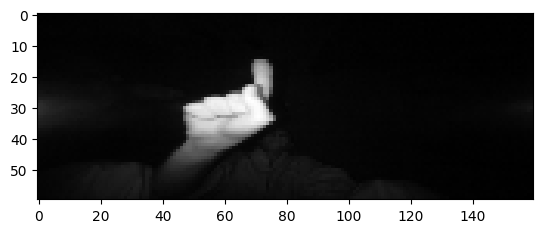

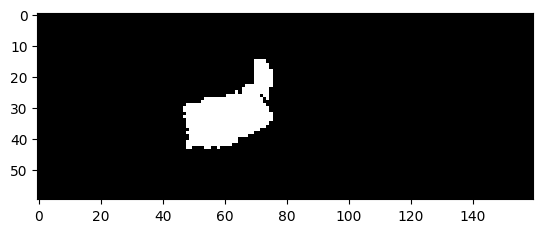

Class Label: 7


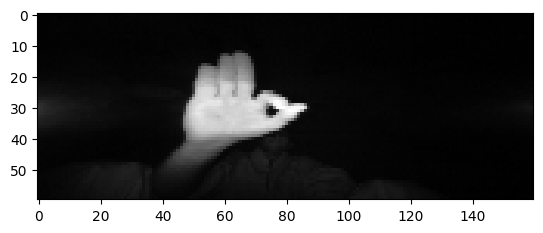

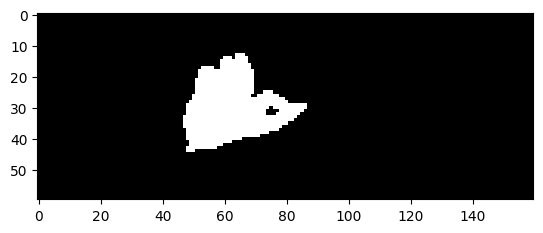

Class Label: 8


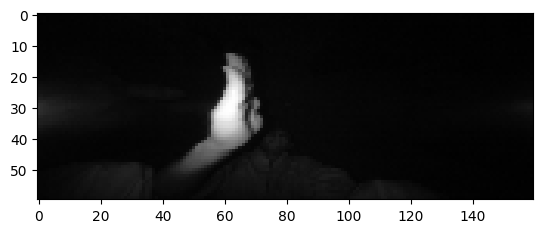

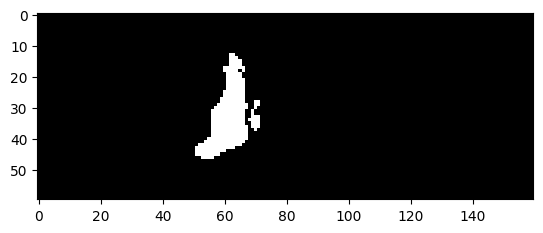

Class Label: 9


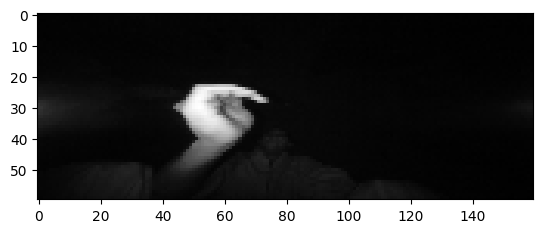

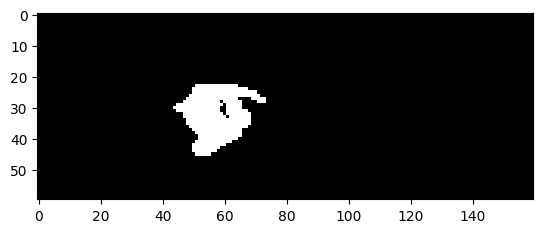

Class Label: 10


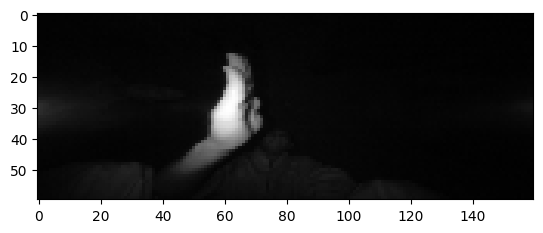

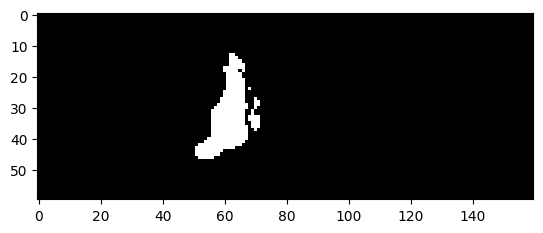

In [40]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)
    plt.show()

In [41]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [42]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Performing One Hot Encoding

In [43]:
import keras
from keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)



y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 0 0 0 0 0 1 0 0]
<class 'numpy.ndarray'>


In [44]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


Splitting Train AND Test Data

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [46]:
from keras import layers
from keras import models

Building Model

In [47]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compile and Train The Model

In [48]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 5s 9ms/step - loss: 0.3974 - accuracy: 0.8698 - val_loss: 0.0132 - val_accuracy: 0.9985
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0278 - accuracy: 0.9927 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 5/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 3.3646e-04 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 2s 6ms/step - loss: 1.8379e-05 - accuracy: 1.0000 - val_loss: 1.6755e-04 - val_accuracy: 1

Saving Model in .h5 Format

In [49]:
model.save('cnn_results.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Evaluation

In [50]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 0s 4ms/step - loss: 3.9227e-04 - accuracy: 1.0000
Accuracy:1.0


Prediction

Folders found: ['01_palm', '07_ok', '10_down', '09_c', '08_palm_moved', '04_fist_moved', '06_index', '02_l', '05_thumb', '03_fist']
1/1 [==============================] - 0s 397ms/step
Completed folder 01_palm
1/1 [==============================] - 0s 95ms/step
Completed folder 07_ok
1/1 [==============================] - 0s 90ms/step
Completed folder 10_down
1/1 [==============================] - 0s 93ms/step
Completed folder 09_c
1/1 [==============================] - 0s 58ms/step
Completed folder 08_palm_moved
1/1 [==============================] - 0s 50ms/step
Completed folder 04_fist_moved
1/1 [==============================] - 0s 34ms/step
Completed folder 06_index
1/1 [==============================] - 0s 184ms/step
Completed folder 02_l
1/1 [==============================] - 0s 237ms/step
Completed folder 05_thumb
1/1 [==============================] - 0s 40ms/step
Completed folder 03_fist


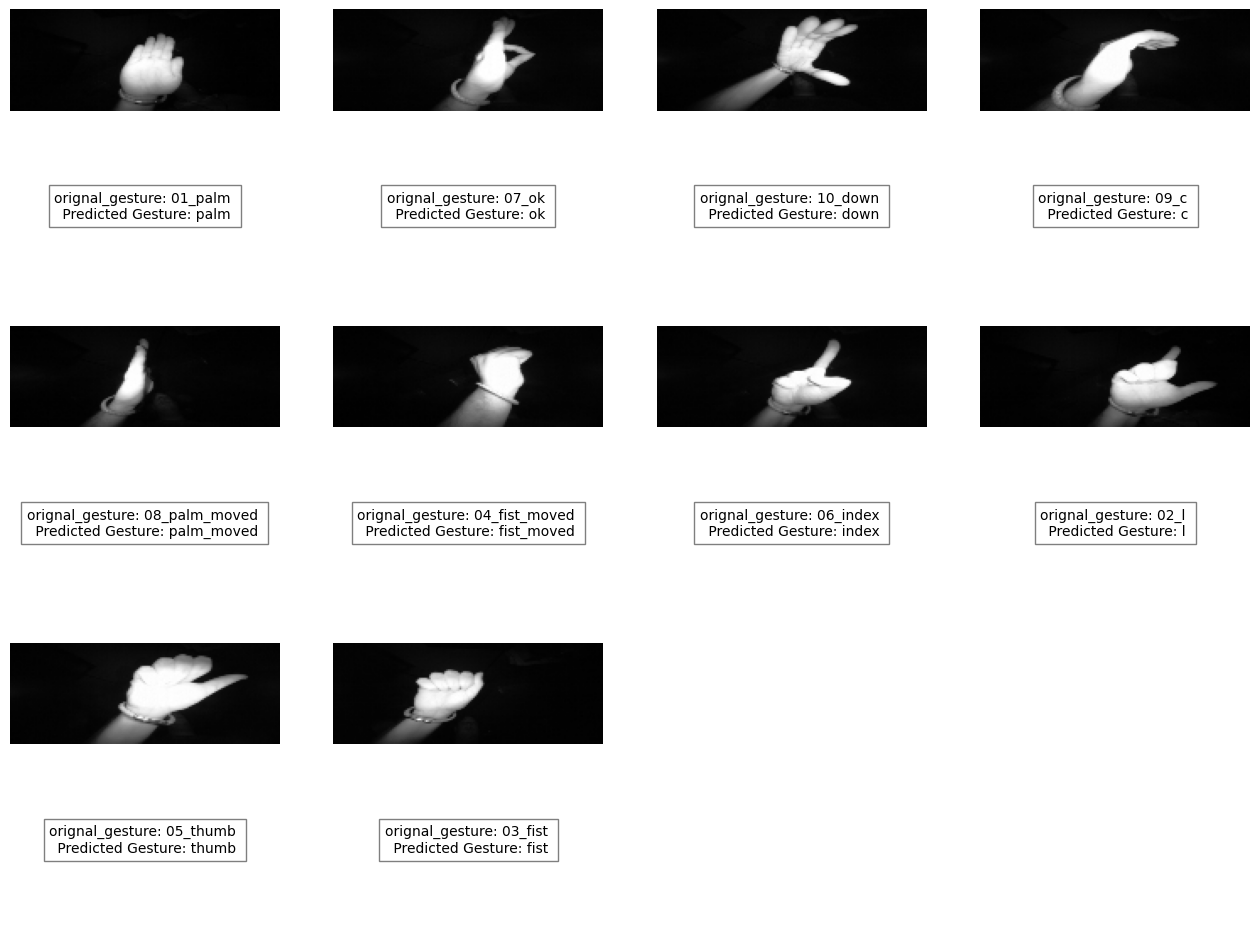

In [53]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

# Load the saved model
model = load_model('cnn_results.h5')

# Define the class lookup dictionary
class_lookup = {
    0: 'palm', 1: 'l', 2: 'fist', 3: 'fist_moved', 4: 'thumb',
    5: 'index', 6: 'ok', 7: 'palm_moved', 8: 'c', 9: 'down'
}

def preprocess_image(image_path, img_size=(160, 60)):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")

    # Resize the image to the expected input size
    img = cv2.resize(img, img_size)

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Expand dimensions to match the input shape
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)

    return img

def predict_gesture(image_path, model, class_lookup):
    preprocessed_img = preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_lookup[predicted_class_index]
    return predicted_class_label

def display_random_images_from_folders(root_folder, model, class_lookup):
    folders = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]
    print(f"Folders found: {folders}")  # Debug statement

    images = []
    labels = []

    for folder in folders:
        folder_path = os.path.join(root_folder, folder)
        image_files = [img for img in os.listdir(folder_path) if img.endswith('.png') or img.endswith('.jpg')]


        if image_files:
            # Pick a random image
            random_image = random.choice(image_files)
            image_path = os.path.join(folder_path, random_image)

            # Predict gesture
            predicted_gesture = predict_gesture(image_path, model, class_lookup)

            # Load and resize the image
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (160, 60))

            # Store image and label
            images.append(img)
            labels.append(f'orignal_gesture: {folder} \n Predicted Gesture: {predicted_gesture}')


        else:
            print(f"No images found in {folder_path}")  # Debug statement
        print(f"Completed folder {folder}")

    # Display images in a horizontal grid
    num_images = len(images)
    num_cols = 4  # Number of columns per row
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axs = plt.subplots(num_rows * 2, num_cols, figsize=(num_cols * 4, num_rows * 4))

    for i in range(num_images):
        row = i // num_cols
        col = i % num_cols

        axs[2 * row, col].imshow(images[i], cmap='gray')
        axs[2 * row, col].axis('off')

        axs[2 * row + 1, col].text(0.5, 0.5, labels[i], fontsize=10, ha='center', va='baseline', bbox=dict(facecolor='white', alpha=0.5))
        axs[2 * row + 1, col].axis('off')

    # Hide unused subplots if any
    for j in range(num_images, num_rows * num_cols):
        axs[2 * (j // num_cols), j % num_cols].axis('off')
        axs[2 * (j // num_cols) + 1, j % num_cols].axis('off')

    # plt.tight_layout()
    plt.show()

# Path to the root folder containing gesture folders
root_folder = '/content/leapGestRecog/08'

# Display random images with predictions
display_random_images_from_folders(root_folder, model, class_lookup)

